In [1]:
import pandas as pd

df = pd.read_parquet("pns_filtrada.parquet")
df

,P00601,P00602,P00604,P00605,P01101,P013,P015,P00612,P023,P02401,...,Q08901,Q09301,Q111,Q11701,Q12201,Q125,L021,L024,L027,L030
0,1,1,1,2,3,6,3,1,7,2,...,NA,50,NA,NA,NA,NA,NA,NA,NA,NA
1,1,2,1,2,4,2,0,2,0,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,1,2,1,2,7,0,3,1,0,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,1,2,1,1,7,3,3,1,0,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,1,2,2,1,3,2,1,2,7,2,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60939,1,1,1,1,5,2,0,1,2,2,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
60940,1,1,1,2,5,2,1,2,3,2,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
60941,1,1,1,2,3,3,1,2,0,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
60942,2,2,1,1,7,2,0,2,6,2,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [2]:
import numpy as np

# Substituir 'NA' por NaN
df['Q003'] = df['Q003'].replace('NA', np.nan)

# Converter para numérico
df['Q003'] = pd.to_numeric(df['Q003'], errors='coerce')

# Criar faixas etárias (não precisa converter para inteiro)
bins = [0, 10, 20, 30, 40, 50, 60, 70, np.inf]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70+']
df['faixa_et_diag_hip'] = pd.cut(df['Q003'], bins=bins, labels=labels, right=False)
df_idades_hip = df[df['Q00201'] == '1']

df_idades_hip

,P00601,P00602,P00604,P00605,P01101,P013,P015,P00612,P023,P02401,...,Q09301,Q111,Q11701,Q12201,Q125,L021,L024,L027,L030,faixa_et_diag_hip
0,1,1,1,2,3,6,3,1,7,2,...,50,NA,NA,NA,NA,NA,NA,NA,NA,40-50
5,1,1,1,1,7,7,0,1,7,2,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,60-70
9,1,1,1,2,3,0,2,1,7,2,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,60-70
21,1,2,1,2,2,4,2,1,7,1,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,50-60
25,1,2,1,2,5,0,2,1,2,2,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,60-70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60914,1,2,1,2,2,5,0,1,7,1,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,10-20
60924,1,2,1,2,2,2,0,2,0,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,10-20
60930,1,2,2,1,0,2,2,2,0,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,50-60
60935,1,2,1,1,2,3,1,1,7,2,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,40-50


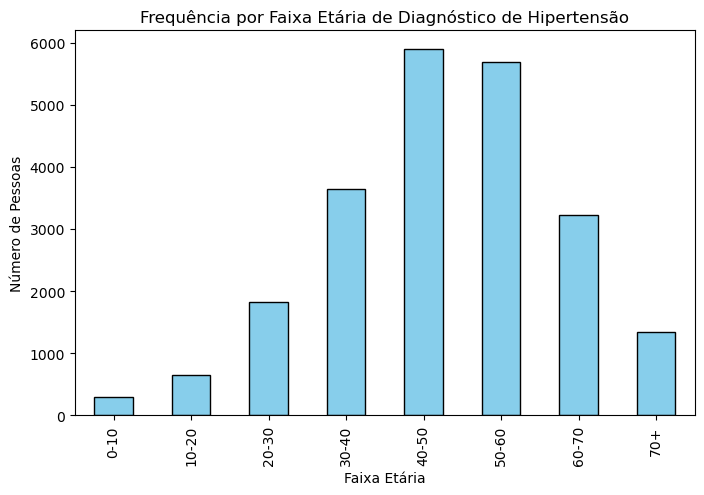

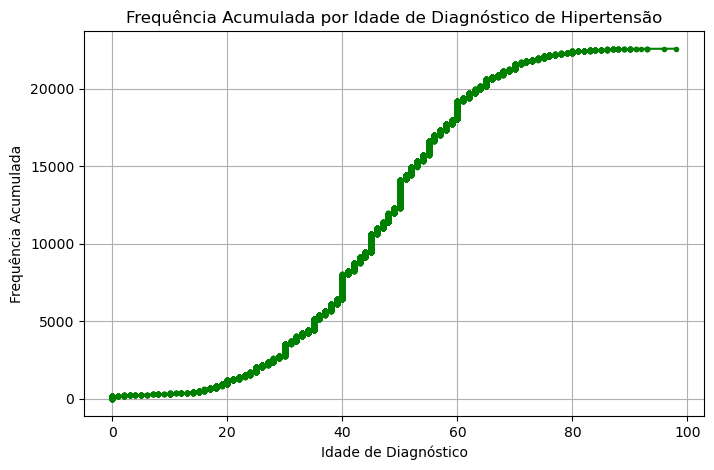

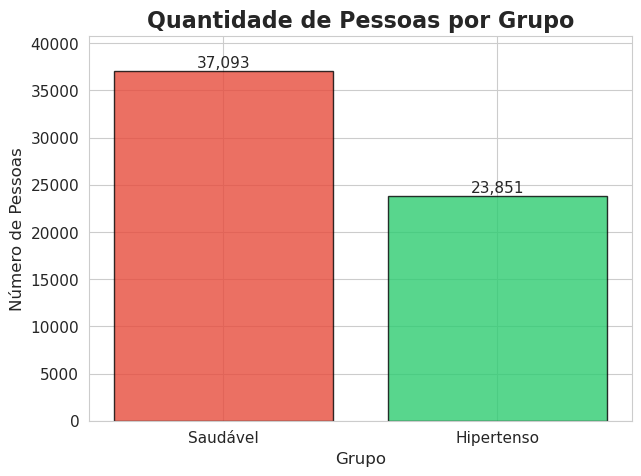

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- Gráfico de frequência por faixa etária ---
frequencia = df_idades_hip['faixa_et_diag_hip'].value_counts().sort_index()

plt.figure(figsize=(8,5))
frequencia.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Frequência por Faixa Etária de Diagnóstico de Hipertensão')
plt.xlabel('Faixa Etária')
plt.ylabel('Número de Pessoas')

# salvar
plt.savefig("/home/ettore/Documentos/PUC/DataMining/Artefatos/frequencia_faixa_etaria.png", 
            dpi=300, bbox_inches="tight")
plt.show()


# --- Gráfico de frequência acumulada ---
idades = df_idades_hip['Q003'].dropna().sort_values()
freq_acum = np.arange(1, len(idades)+1)

plt.figure(figsize=(8,5))
plt.plot(idades, freq_acum, marker='.', linestyle='-', color='green')
plt.title('Frequência Acumulada por Idade de Diagnóstico de Hipertensão')
plt.xlabel('Idade de Diagnóstico')
plt.ylabel('Frequência Acumulada')
plt.grid(True)

# salvar
plt.savefig("/home/ettore/Documentos/PUC/DataMining/Artefatos/frequencia_acumulada.png", 
            dpi=300, bbox_inches="tight")
plt.show()


# --- Gráfico de comparação Hipertensos vs Saudáveis ---
sns.set_style("whitegrid")
df['hipertensao'] = df['Q00201'].apply(lambda x: 'Hipertenso' if x == '1' else 'Saudável')
contagem = df['hipertensao'].value_counts()

plt.figure(figsize=(7,5))
colors = ['#e74c3c', '#2ecc71']
bars = plt.bar(contagem.index, contagem.values, color=colors, edgecolor='black', alpha=0.8)

for bar in bars:
    altura = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, altura + 50, f'{altura:,}', 
             ha='center', va='bottom', fontsize=11)

plt.title('Quantidade de Pessoas por Grupo', fontsize=16, weight='bold')
plt.ylabel('Número de Pessoas', fontsize=12)
plt.xlabel('Grupo', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.ylim(0, max(contagem.values)*1.1)

# salvar
plt.savefig("/home/ettore/Documentos/PUC/DataMining/Artefatos/hipertensos_vs_saudaveis.png", 
            dpi=300, bbox_inches="tight")
plt.show()


In [4]:
variaveis = [
    "P00601", "P00602", "P00604", "P00605", "P01101", "P013", "P015",
    "P00612", "P023", "P02401", "P00613", "P00603", "P00607", "P00608",
    "P00609", "P00610", "P00611", "P00901", "P01001", "P018", "P019",
    "P00614", "P00615", "P00616", "P00617", "P00618", "P00619", "P00620",
    "P00621", "P00622", "P00623", "P02001", "P02002", "P02101", "P02102",
    "P02501", "P02602", "P027", "P029", "P03301", "P03302", "P03303",
    "P034", "P035", "P036", "P03701", "P03702", "Q00201", "Q06306",
    "Q06307", "Q06308", "Q06309", "Q06310", "Q06311", "Q028", "Q067",
    "J02901", "Q00601", "Q00602", "Q01912", "Q04711", "V0001", "V0031",
    "Q003", "Q064"
]

df_filtrado = df_idades_hip[variaveis]
df_filtrado

,P00601,P00602,P00604,P00605,P01101,P013,P015,P00612,P023,P02401,...,Q067,J02901,Q00601,Q00602,Q01912,Q04711,V0001,V0031,Q003,Q064
0,1,1,1,2,3,6,3,1,7,2,...,NA,NA,1,NA,1,NA,11,1,46.0,NA
5,1,1,1,1,7,7,0,1,7,2,...,NA,NA,2,6,2,NA,11,1,62.0,NA
9,1,1,1,2,3,0,2,1,7,2,...,NA,NA,1,NA,2,1,11,1,65.0,NA
21,1,2,1,2,2,4,2,1,7,1,...,NA,NA,1,NA,1,NA,11,1,50.0,NA
25,1,2,1,2,5,0,2,1,2,2,...,NA,NA,3,7,2,NA,11,1,68.0,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60914,1,2,1,2,2,5,0,1,7,1,...,NA,NA,3,7,1,NA,53,1,12.0,NA
60924,1,2,1,2,2,2,0,2,0,NA,...,1,NA,1,NA,1,NA,53,1,19.0,37
60930,1,2,2,1,0,2,2,2,0,NA,...,3,NA,1,NA,1,NA,53,1,54.0,54
60935,1,2,1,1,2,3,1,1,7,2,...,NA,NA,1,NA,1,1,53,1,45.0,NA


In [6]:
def converter_numerico(data, coluna, num_ignorado):
    data.loc[:, coluna] = data[coluna].replace('NA', np.nan)
    data.loc[:, coluna] = pd.to_numeric(data[coluna], errors='coerce')
    data.loc[:, coluna] = data[coluna].replace(num_ignorado, np.nan)

cols_9 = [
    "P01101", "P013", "P015", "P023", "P00901",
    "P018", "P019", "P02001", "P02002", "P035", "P03701"
]

cols_99 = [
    "P029", "P03702", "Q003", "Q064"
]

for col in cols_9:
    if col in df_filtrado.columns:
        converter_numerico(df_filtrado, col, 9)

for col in cols_99:
    if col in df_filtrado.columns:
        converter_numerico(df_filtrado, col, 99)
df_filtrado

,P00601,P00602,P00604,P00605,P01101,P013,P015,P00612,P023,P02401,...,Q067,J02901,Q00601,Q00602,Q01912,Q04711,V0001,V0031,Q003,Q064
0,1,1,1,2,3,6,3,1,7,2,...,NA,NA,1,NA,1,NA,11,1,46.0,NaN
5,1,1,1,1,7,7,0,1,7,2,...,NA,NA,2,6,2,NA,11,1,62.0,NaN
9,1,1,1,2,3,0,2,1,7,2,...,NA,NA,1,NA,2,1,11,1,65.0,NaN
21,1,2,1,2,2,4,2,1,7,1,...,NA,NA,1,NA,1,NA,11,1,50.0,NaN
25,1,2,1,2,5,0,2,1,2,2,...,NA,NA,3,7,2,NA,11,1,68.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60914,1,2,1,2,2,5,0,1,7,1,...,NA,NA,3,7,1,NA,53,1,12.0,NaN
60924,1,2,1,2,2,2,0,2,0,NA,...,1,NA,1,NA,1,NA,53,1,19.0,37.0
60930,1,2,2,1,0,2,2,2,0,NA,...,3,NA,1,NA,1,NA,53,1,54.0,54.0
60935,1,2,1,1,2,3,1,1,7,2,...,NA,NA,1,NA,1,1,53,1,45.0,NaN


In [8]:
df_filtrado = df_filtrado.replace('NA', np.nan)

In [9]:
def gerar_resumo(df, nome_arquivo='resumo_dados.txt'):
    # Separa tipos de colunas
    numericas = df.select_dtypes(include=['int64', 'float64']).columns
    categoricas = df.select_dtypes(exclude=['int64', 'float64']).columns

    with open(nome_arquivo, 'w', encoding='utf-8') as f:
        f.write("===== RESUMO ESTATÍSTICO =====\n\n")

        # --- Colunas numéricas ---
        f.write("### Colunas Numéricas ###\n\n")
        for col in numericas:
            f.write(f"Coluna: {col}\n")
            descr = df[col].describe()
            f.write(descr.to_string())
            f.write("\n\n")

        # --- Colunas categóricas ---
        f.write("### Colunas Categóricas ###\n\n")
        for col in categoricas:
            f.write(f"Coluna: {col}\n")
            descr = df[col].describe()
            f.write(descr.to_string())
            f.write("\n\n")

    print(f"✅ Resumo salvo em: {nome_arquivo}")

gerar_resumo(df_filtrado)


✅ Resumo salvo em: resumo_dados.txt
